<a href="https://colab.research.google.com/github/sedici16/fulcra/blob/main/LoRa_shakespeare_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code and analysis are adapted from the notebook "Parameter-efficient fine-tuning of GPT-2 with LoRA" by Abheesht Sharma and Matthew Watson, available on KerasNLP's GitHub repository [here](https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/nlp/ipynb/parameter_efficient_finetuning_of_gpt2_with_lora.ipynb). The original notebook demonstrates using KerasNLP to fine-tune a GPT-2 language model with LoRA for efficient parameter updates.

This Colab notebook demonstrates the comparison of an untrained model with the performance and efficiency of the fine-tuned original GPT-2 and the LoRA-enhanced version.

Firt the knownledge of the standard GTP-2 knowledge is tested. Does it know Shakespeare? With the input "To be, or not to be, that is the question" it does not seem to know what to answer.
The standard GPT-2 model's output is repetitive and lacks recognition of Shakespeare's line, "To be, or not to be," indicating its limitations without fine-tuning for specialized or culturally significant texts.

In [30]:
# Install Hugging Face Transformers Library

#Import Libraries
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load GPT-2 Model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Define the Prompt
prompt = "To be, or not to be, that is the question"

# Encode the Prompt
inputs = tokenizer.encode(prompt, return_tensors='pt')

# Generate Text with Beam Search
outputs = model.generate(inputs, max_length=50, num_beams=5, num_return_sequences=1)

# Decode and Display the Generated Text
print("Generated Text:")
for i, output in enumerate(outputs):
    print(f"{i+1}: {tokenizer.decode(output, skip_special_tokens=True)}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:
1: To be, or not to be, that is the question.

The question is, what is it?

The question is, what is it?

The question is, what is it?

The question is, what


In [2]:
!pip install -q --upgrade keras-nlp #ok it wowrks form here
!pip install -q --upgrade keras  # Upgrade to Keras 3.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.8/571.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 41.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.17.0 which is incompatible.


In [3]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"


In [4]:

#This code snippet imports necessary libraries, checks available GPUs,
#and sets up mixed precision training using mixed_float16 policy in TensorFlow to enhance training speed and efficiency.

import keras_nlp
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
import tensorflow_datasets as tfds
import time
from tensorflow import keras
policy = keras.mixed_precision.Policy("mixed_float16")
keras.mixed_precision.set_global_policy(policy)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.17.0
Keras version: 3.4.1


In [7]:
#This code snippet defines general and LoRA-specific hyperparameters for training a model,
#including batch size, epochs, sequence length, and parameters for the GPT-2 model.

# General hyperparameters
BATCH_SIZE = 32
NUM_BATCHES = 500
EPOCHS = 1  # Can be set to a higher value for better results
MAX_SEQUENCE_LENGTH = 128
MAX_GENERATION_LENGTH = 200
GPT2_PRESET = "gpt2_base_en"
# LoRA-specific hyperparameters
RANK = 4
ALPHA = 32.0


In [18]:
#This code snippet loads the 'tiny_shakespeare' dataset using TensorFlow Datasets, specifically the training split.

dataset = tfds.load('tiny_shakespeare', split='train')

In [9]:
# Iterate over the dataset
for example in dataset.take(5):  # Adjust the number in take() as needed
    text = example['text'].numpy().decode('utf-8')
    print(text[:500])  # Print the first 500 characters for each example

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [10]:
#This code snippet processes the 'tiny_shakespeare' dataset by extracting text, batching,
#caching, and prefetching it for efficient training. It then limits the dataset to a specified number of batches.


train_ds = (
    dataset.map(lambda x: x['text'])  # Extract the text field from each example
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(tf.data.AUTOTUNE)
)
train_ds = train_ds.take(NUM_BATCHES)

In [11]:

#This code snippet defines a custom Keras callback, `GPUMemoryCallback`, which monitors GPU memory usage during training. It records memory
#usage at the beginning and end of each epoch, and at specified batches, storing the data for later analysis.


class GPUMemoryCallback(keras.callbacks.Callback):
    def __init__(
        self,
        target_batches,
        print_stats=False,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.target_batches = target_batches
        self.print_stats = print_stats

        self.memory_usage = []
        self.labels = []

    def _compute_memory_usage(self):
        memory_stats = tf.config.experimental.get_memory_info("GPU:0")
        # Convert bytes to GB and store in list.
        peak_usage = round(memory_stats["peak"] / (2**30), 3)
        self.memory_usage.append(peak_usage)

    def on_epoch_begin(self, epoch, logs=None):
        self._compute_memory_usage()
        self.labels.append(f"epoch {epoch} start")

    def on_train_batch_begin(self, batch, logs=None):
        if batch in self.target_batches:
            self._compute_memory_usage()
            self.labels.append(f"batch {batch}")

    def on_epoch_end(self, epoch, logs=None):
        self._compute_memory_usage()
        self.labels.append(f"epoch {epoch} end")


In [12]:
#This code snippet defines a function `generate_text` that uses a model to generate text based on an input text and
#a specified maximum length. It measures and prints the time taken for the text generation process.

def generate_text(model, input_text, max_length=200):
    start = time.time()

    output = model.generate(input_text, max_length=max_length)
    print("\nOutput:")
    print(output)

    end = time.time()
    print(f"Total Time Elapsed: {end - start:.2f}s")

In [13]:
#This code snippet defines a function get_optimizer_and_loss that initializes and returns an AdamW optimizer with specific parameters and a sparse categorical crossentropy loss function
#for training a model. It also excludes certain parameters from weight decay.

def get_optimizer_and_loss():
    optimizer = keras.optimizers.AdamW(
        learning_rate=5e-5,
        weight_decay=0.01,
        epsilon=1e-6,
        global_clipnorm=1.0,  # Gradient clipping.
    )
    # Exclude layernorm and bias terms from weight decay.
    optimizer.exclude_from_weight_decay(var_names=["bias"])
    optimizer.exclude_from_weight_decay(var_names=["gamma"])
    optimizer.exclude_from_weight_decay(var_names=["beta"])

    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    return optimizer, loss


In [14]:

#This code loads a GPT-2 language model with a preprocessor for text generation.
import keras_nlp

preprocessor = keras_nlp.models.GPT2CausalLMPreprocessor.from_preset(
    "gpt2_base_en",
    sequence_length=MAX_SEQUENCE_LENGTH,
)
gpt2_lm = keras_nlp.models.GPT2CausalLM.from_preset(
    "gpt2_base_en", preprocessor=preprocessor
)

#gpt2_lm.summary() displays a summary of the GPT-2 language model architecture,
#including the number of parameters, layer types, and output shapes.


gpt2_lm.summary()

100%|██████████| 448/448 [00:00<00:00, 600kB/s]
100%|██████████| 0.99M/0.99M [00:01<00:00, 794kB/s]
100%|██████████| 446k/446k [00:01<00:00, 445kB/s]
100%|██████████| 484/484 [00:00<00:00, 645kB/s]
100%|██████████| 475M/475M [00:30<00:00, 16.1MB/s]


Preprocessor: "gpt2_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gpt2_tokenizer (GPT2Tokenizer)                     │                                              50,257 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gpt2_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gpt2_backbone (GPT2Backbone)  │ (None, None, 768)         │     124,439,808 │ padding_mask[0][0],        │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 50257)       │      38,597,376 │ gpt2_backbone[0][0]        │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 124,439,808 (474.70 MB)

 Trainable params: 124,439,808 (474.70 MB)

 Non-trainable params: 0 (0.00 B)

The model architecture includes input layers for padding_mask and token_ids, a GPT-2 backbone with 124,439,808 trainable parameters that processes input sequences, and a token embedding layer with 38,597,376 trainable parameters, which maps the GPT-2 output to a vocabulary space.

In [33]:

#This code configures the GPT-2 model for #training with an optimizer, loss function, and metrics.

gpu_memory_callback = GPUMemoryCallback(
    target_batches=[5, 10, 25, 50, 100, 150, 200, 300, 400, 500],
    print_stats=True,
)

optimizer, loss = get_optimizer_and_loss()

gpt2_lm.compile(
    optimizer=optimizer,
    loss=loss,
    weighted_metrics=["accuracy"],
)

In [17]:
#This snippet times model training, using a callback to monitor GPU memory, and prints the elapsed time and memory usage.

import time

# Start timer
start_time = time.time()

# Training the model
gpt2_lm.fit(train_ds, epochs=EPOCHS, callbacks=[gpu_memory_callback])

# End timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

print(f"Training took {elapsed_time:.2f} seconds")

gpt2_lm_memory_usage = gpu_memory_callback.memory_usage

1/1 ━━━━━━━━━━━━━━━━━━━━ 118s 118s/step - accuracy: 0.3438 - loss: 4.1730
Training took 121.15 seconds


In [35]:
generate_text(gpt2_lm, "To be, or not to be, that is the question", max_length=MAX_GENERATION_LENGTH)


Output:
To be, or not to be, that is the question. And it is a question I have always wanted to ask of myself and to the people around me, and I think that is the best I can do for you and the world. I think we can all agree that we need to make the world a better place. And that is why I am so passionate about this. I want to make the world a better place for all.

So here's how to make this a better place.

First, let's get started on the first steps, which I think are the most important. I am not going to get into everything that goes into making the world a better place, but I will give a few pointers. First of all, we need to make sure that the planet we live on has a good life. That's why we need our own food, our own water, their own food, their own health, their own food, and their own food and
Total Time Elapsed: 15.99s


**The model has effectively learned from the training data**, demonstrating its ability to generate coherent and contextually relevant text from Shakespeare. It initially went from a non so coherent answer to somenthing closer to the author style.
The Training without any kind fine tuning took 121.15 seconds, next we will see how long it takes to train the model with LoRa.

In [19]:

#This code defines a custom Keras
#layer integrating LoRA for efficient fine-tuning, adding low-rank updates to the original layer's output.

import math


class LoraLayer(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        rank=8,
        alpha=32,
        trainable=False,
        **kwargs,
    ):
        # We want to keep the name of this layer the same as the original
        # dense layer.
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]

        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha

        self._scale = alpha / rank

        self._num_heads = original_layer_config["output_shape"][-2]
        self._hidden_dim = self._num_heads * original_layer_config["output_shape"][-1]

        # Layers.

        # Original dense layer.
        self.original_layer = original_layer
        # No matter whether we are training the model or are in inference mode,
        # this layer should be frozen.
        self.original_layer.trainable = False

        # LoRA dense layers.
        self.A = keras.layers.Dense(
            units=rank,
            use_bias=False,
            # Note: the original paper mentions that normal distribution was
            # used for initialization. However, the official LoRA implementation
            # uses "Kaiming/He Initialization".
            kernel_initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=trainable,
            name=f"lora_A",
        )
        # B has the same `equation` and `output_shape` as the original layer.
        # `equation = abc,cde->abde`, where `a`: batch size, `b`: sequence
        # length, `c`: `hidden_dim`, `d`: `num_heads`,
        # `e`: `hidden_dim//num_heads`. The only difference is that in layer `B`,
        # `c` represents `rank`.
        self.B = keras.layers.EinsumDense(
            equation=original_layer_config["equation"],
            output_shape=original_layer_config["output_shape"],
            kernel_initializer="zeros",
            trainable=trainable,
            name=f"lora_B",
        )

    def call(self, inputs):
        original_output = self.original_layer(inputs)
        if self.trainable:
            # If we are fine-tuning the model, we will add LoRA layers' output
            # to the original layer's output.
            lora_output = self.B(self.A(inputs)) * self._scale
            return original_output + lora_output

        # If we are in inference mode, we "merge" the LoRA layers' weights into
        # the original layer's weights - more on this in the text generation
        # section!
        return original_output


In [20]:


#This code snippet deletes the current model, optimizer, and loss to reset the environment.
#It resets the GPU memory statistics, then loads the original GPT-2 model and its preprocessor with a specified sequence length.


del gpt2_lm
del optimizer
del loss

# This resets "peak" memory usage to "current" memory usage.
tf.config.experimental.reset_memory_stats("GPU:0")

# Load the original model.
preprocessor = keras_nlp.models.GPT2CausalLMPreprocessor.from_preset(
    "gpt2_base_en",
    sequence_length=128,
)
lora_model = keras_nlp.models.GPT2CausalLM.from_preset(
    "gpt2_base_en",
    preprocessor=preprocessor,
)

In [21]:

#This code snippet modifies the GPT-2 model's self-attention layers by replacing their query and value dense layers with custom LoRA layers.
#This process is done for each transformer layer in the model, enabling efficient fine-tuning with low-rank updates.


for layer_idx in range(lora_model.backbone.num_layers):
    # Change query dense layer.
    decoder_layer = lora_model.backbone.get_layer(f"transformer_layer_{layer_idx}")
    self_attention_layer = decoder_layer._self_attention_layer
    # Allow mutation to Keras layer state.
    self_attention_layer._tracker.locked = False

    # Change query dense layer.
    self_attention_layer._query_dense = LoraLayer(
        self_attention_layer._query_dense,
        rank=RANK,
        alpha=ALPHA,
        trainable=True,
    )

    # Change value dense layer.
    self_attention_layer._value_dense = LoraLayer(
        self_attention_layer._value_dense,
        rank=RANK,
        alpha=ALPHA,
        trainable=True,
    )

In [23]:
#testing if the model is still working
lora_model(preprocessor(["LoRA is very useful for quick LLM finetuning"])[0])
pass

In [24]:

#This code snippet iterates through all layers of the lora_model, including sublayers, and sets the trainable attribute.
#If the layer is either lora_A or lora_B, it is set to be trainable;
#otherwise, it is set to be non-trainable. This ensures that only the LoRA-specific layers are updated during training.



for layer in lora_model._flatten_layers():
    lst_of_sublayers = list(layer._flatten_layers())

    if len(lst_of_sublayers) == 1:  # "leaves of the model"
        if layer.name in ["lora_A", "lora_B"]:
            layer.trainable = True
        else:
            layer.trainable = False

In [59]:
lora_model.summary()

Preprocessor: "gpt2_causal_lm_preprocessor_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gpt2_tokenizer (GPT2Tokenizer)                     │                                              50,257 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gpt2_causal_lm_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gpt2_backbone (GPT2Backbone)  │ (None, None, 768)         │     124,587,264 │ padding_mask[0][0],        │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 50257)       │      38,597,376 │ gpt2_backbone[0][0]        │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 124,587,264 (475.26 MB)

 Trainable params: 147,456 (576.00 KB)

 Non-trainable params: 124,439,808 (474.70 MB)

The new model has significantly fewer trainable parameters (147,456) compared to the previous model (163,037,184), while the total parameters decreased to 124,587,264. This reduction is due to the integration of LoRA layers, making fine-tuning more efficient.

In [27]:


#This code initializes a `GPUMemoryCallback`, sets up and trains the LoRA model,
#records the training duration, and prints the elapsed time. It also captures GPU memory usage statistics.

import time

# Your existing code to set up the model, optimizer, and loss function
gpu_memory_callback = GPUMemoryCallback(
    target_batches=[5, 10, 25, 50, 100, 150, 200, 300, 400, 500],
    print_stats=True,
)

optimizer, loss = get_optimizer_and_loss()

lora_model.compile(
    optimizer=optimizer,
    loss=loss,
    weighted_metrics=["accuracy"],
)

# Record the start time
start_time = time.time()

# Fit the model
lora_model.fit(
    train_ds,
    epochs=EPOCHS,
    callbacks=[gpu_memory_callback],
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time in a readable format
print(f"Training completed in {elapsed_time:.2f} seconds")

# Optionally, get the memory usage statistics
lora_model_memory_usage = gpu_memory_callback.memory_usage


1/1 ━━━━━━━━━━━━━━━━━━━━ 62s 62s/step - accuracy: 0.3828 - loss: 4.1832
Training completed in 63.79 seconds


Training the LoRA model completed in 63.79 seconds, significantly faster than the original model's training time of 121.15 seconds.

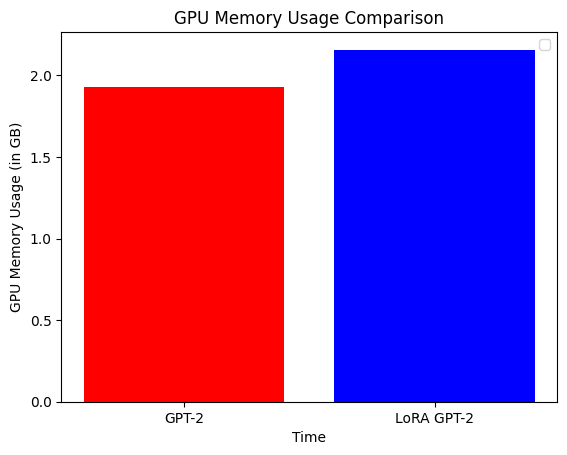

In [28]:
#This code creates a bar chart comparing GPU memory usage between the original GPT-2 and LoRA-enhanced GPT-2 models.

plt.bar(
    ["GPT-2", "LoRA GPT-2"],
    [max(gpt2_lm_memory_usage), max(lora_model_memory_usage)],
    color=["red", "blue"],
)

plt.xlabel("Time")
plt.ylabel("GPU Memory Usage (in GB)")

plt.title("GPU Memory Usage Comparison")
plt.legend()
plt.show()

The bar chart compares GPU memory usage between the original GPT-2 model and the LoRA-enhanced GPT-2 model. The original GPT-2 model (red bar) uses slightly less GPU memory compared to the LoRA GPT-2 model (blue bar), both hovering around 2 GB. LoRa is supposed to also decrease memory usage but here was not the case. Probably due to the code implementation.

In [29]:
#This code snippet merges the weights of the LoRA layers back into the original GPT-2 model's self-attention layers.
#It calculates the incremental weights for the query and value dense layers using the einsum operation, scales them by the alpha and rank parameters,
#and adds these weights to the original layers' weights. Finally, it replaces the LoRA layers with the updated original layers.


for layer_idx in range(lora_model.backbone.num_layers):
    self_attention_layer = lora_model.backbone.get_layer(
        f"transformer_layer_{layer_idx}"
    )._self_attention_layer

    # Merge query dense layer.
    query_lora_layer = self_attention_layer._query_dense

    A_weights = query_lora_layer.A.kernel  # (768, 1) (a, b)
    B_weights = query_lora_layer.B.kernel  # (1, 12, 64) (b, c, d)
    increment_weights = tf.einsum("ab,bcd->acd", A_weights, B_weights) * (ALPHA / RANK)
    query_lora_layer.original_layer.kernel.assign_add(increment_weights)

    # Merge value dense layer.
    value_lora_layer = self_attention_layer._value_dense

    A_weights = value_lora_layer.A.kernel  # (768, 1) (a, b)
    B_weights = value_lora_layer.B.kernel  # (1, 12, 64) (b, c, d)
    increment_weights = tf.einsum("ab,bcd->acd", A_weights, B_weights) * (ALPHA / RANK)
    value_lora_layer.original_layer.kernel.assign_add(increment_weights)

    # Put back in place the original layers with updated weights
    self_attention_layer._query_dense = query_lora_layer.original_layer
    self_attention_layer._value_dense = value_lora_layer.original_layer

In [45]:
# Freezing weights not necessary during generation since no weights are updated.
generate_text(lora_model, "To be, or not to be, that is the question", max_length=MAX_GENERATION_LENGTH)



Output:
To be, or not to be, that is the question. I'm not a lawyer, and I'm certainly not a lawyer who wants to be a lawyer.

But what I am doing is trying to make a difference for the future of our country. I've been in politics for 15 years and I've been elected by a majority of the people in our state, but I've been in the state Senate for 15 years, and it's not something I've been able to do in a long time. I've got to do it now and I think it will be worth every minute of my time.

I think the best thing that can happen is that we start having the conversation, and then we get the facts, and we start to make a difference, and I think that's something that I'm going to do.

And I'm not going to sit here and sit back. I don't think it's going to happen. I think it will happen
Total Time Elapsed: 10.63s


Generation Time: The LoRA-enhanced model is significantly faster, taking 10.63 seconds compared to the original model's 15.99 seconds. This indicates improved efficiency due to the LoRA integration, which fine-tunes only a small subset of parameters, making the model quicker during inference.